In [1]:
# 1. oov
# 2. jumlah token input (no prompt)
# 3. jumlah triplet, distribusi triplet
# 4. jumlah kalimat tanpa tuple target
# 5. jumlah duplicate dan berapa tuple di dalemnya

In [ ]:
import sys
sys.path.append("../")

In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("rdyzakya/IndoLEGO-ABSA")

In [3]:
import preprocess

data_reader = preprocess.DataReader()
data_augmentator = preprocess.DataAugmentator()

In [9]:
train = data_reader.do("../data/absa/id/william/train.txt")
val = data_reader.do("../data/absa/id/william/dev.txt")
test = data_reader.do("../data/absa/id/william/test.txt")

# Distribution

In [59]:
# Distribution
vocab = tokenizer.get_vocab()
def n_oov(el):
    text = el["text"]
    tokens = tokenizer.tokenize(text)
    n = 0
    for tok in tokens:
        if tok not in vocab:
            n += 1
    return n

def n_triplet(el):
    return len(el["num_targets"])

def n_token(el):
    text = el["text"]
    tokens = tokenizer.tokenize(text)
    return len(tokens)

In [60]:
from tqdm import tqdm
n_oov_train = []
n_triplet_train = []
n_token_train = []
for el in tqdm(train):
    n_oov_train.append(n_oov(el))
    n_triplet_train.append(n_triplet(el))
    n_token_train.append(n_token(el))

n_oov_val = []
n_triplet_val = []
n_token_val = []
for el in tqdm(val):
    n_oov_val.append(n_oov(el))
    n_triplet_val.append(n_triplet(el))
    n_token_val.append(n_token(el))

n_oov_test = []
n_triplet_test = []
n_token_test = []
for el in tqdm(test):
    n_oov_test.append(n_oov(el))
    n_triplet_test.append(n_triplet(el))
    n_token_test.append(n_token(el))

100%|██████████| 1000/1000 [00:00<00:00, 4607.38it/s]


In [24]:
import numpy as np

print("OOV train: ",np.unique(n_oov_train, return_counts=True))
print("OOV val: ",np.unique(n_oov_val, return_counts=True))
print("OOV test: ",np.unique(n_oov_test, return_counts=True))

OOV train:  (array([0]), array([3000], dtype=int64))
OOV val:  (array([0]), array([1000], dtype=int64))
OOV test:  (array([0]), array([1000], dtype=int64))


In [58]:
print("N train triplet:", sum(n_triplet_train))
print("N val triplet:", sum(n_triplet_val))
print("N test triplet:", sum(n_triplet_test))

N train triplet: 7551
N val triplet: 2458
N test triplet: 2709


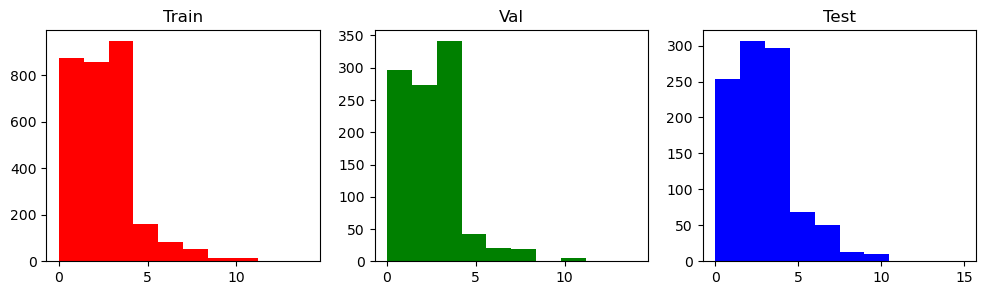

In [42]:
import matplotlib.pyplot as plt

# N Triplet
fig, ax = plt.subplots(1,3,figsize=(12,3))
ax[0].set_title("Train")
ax[1].set_title("Val")
ax[2].set_title("Test")

ax[0].hist(n_triplet_train, color='r')
ax[1].hist(n_triplet_val, color='g')
ax[2].hist(n_triplet_test, color='b')

plt.show()

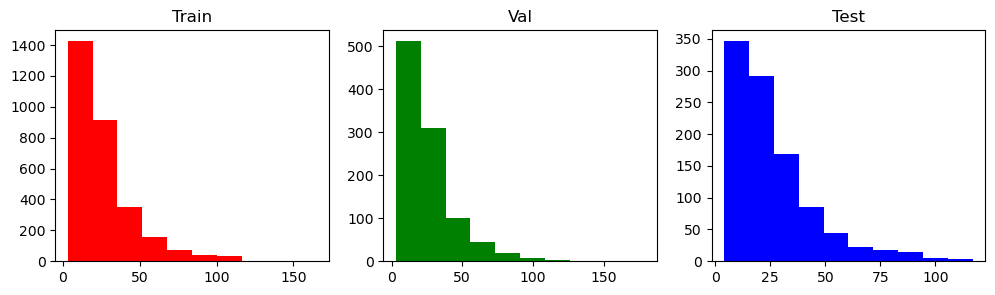

In [61]:
# N Tokens
fig, ax = plt.subplots(1,3,figsize=(12,3))
ax[0].set_title("Train")
ax[1].set_title("Val")
ax[2].set_title("Test")

ax[0].hist(n_token_train, color='r')
ax[1].hist(n_token_val, color='g')
ax[2].hist(n_token_test, color='b')

plt.show()

# Overall

In [44]:
no_triplet_train = 0
for el in train:
    if len(el["num_targets"]) == 0:
        no_triplet_train += 1

no_triplet_val = 0
for el in val:
    if len(el["num_targets"]) == 0:
        no_triplet_val += 1

no_triplet_test = 0
for el in test:
    if len(el["num_targets"]) == 0:
        no_triplet_test += 1

In [45]:
print("No triplet train:", no_triplet_train)
print("No triplet val:", no_triplet_val)
print("No triplet test:", no_triplet_test)

No triplet train: 164
No triplet val: 65
No triplet test: 32


In [46]:
duplicate_train = []
unique_train = []
for el in train:
    if el not in unique_train:
        unique_train.append(el)
    else:
        duplicate_train.append(el)

duplicate_val = []
unique_val = []
for el in val:
    if el not in unique_val:
        unique_val.append(el)
    else:
        duplicate_val.append(el)

duplicate_test = []
unique_test = []
for el in test:
    if el not in unique_test:
        unique_test.append(el)
    else:
        duplicate_test.append(el)

In [47]:
print("N duplicate train:", len(duplicate_train))
print("N duplicate val:", len(duplicate_val))
print("N duplicate test:", len(duplicate_test))

N duplicate train: 29
N duplicate val: 2
N duplicate test: 5


In [48]:
n_triplet_duplicate_train = []
for el in duplicate_train:
    n_triplet_duplicate_train.append(n_triplet(el))

n_triplet_duplicate_val = []
for el in duplicate_val:
    n_triplet_duplicate_val.append(n_triplet(el))

n_triplet_duplicate_test = []
for el in duplicate_test:
    n_triplet_duplicate_test.append(n_triplet(el))

In [50]:
print("N duplicate train triplet:", sum(n_triplet_duplicate_train))
print("N duplicate val triplet:", sum(n_triplet_duplicate_val))
print("N duplicate test triplet:", sum(n_triplet_duplicate_test))

N duplicate train triplet: 39
N duplicate val triplet: 3
N duplicate test triplet: 8


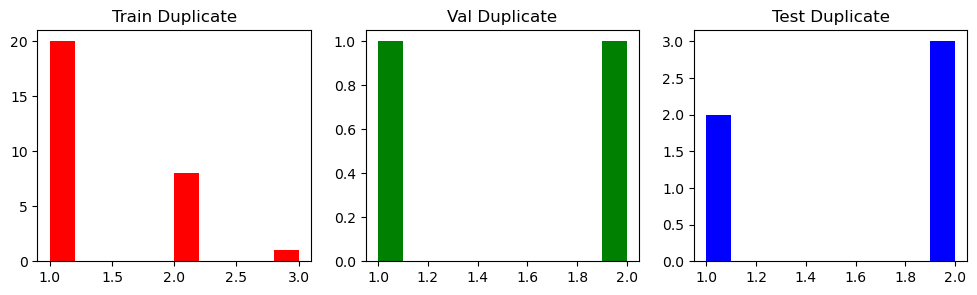

In [49]:
fig, ax = plt.subplots(1,3,figsize=(12,3))
ax[0].set_title("Train Duplicate")
ax[1].set_title("Val Duplicate")
ax[2].set_title("Test Duplicate")

ax[0].hist(n_triplet_duplicate_train, color='r')
ax[1].hist(n_triplet_duplicate_val, color='g')
ax[2].hist(n_triplet_duplicate_test, color='b')

plt.show()